In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer, Normalizer
from sklearn.metrics import r2_score

In [2]:
# pd.options.display.max_rows = 999

In [3]:
train = pd.read_csv('./datasets/train.csv')

In [4]:
test = pd.read_csv('datasets/test.csv')

In [5]:
train_sale = pd.DataFrame(train['SalePrice'])

for c in train:
    if c != 'SalesPrice':
        train_sale[c] = train[c]
        
train = train_sale

# ^ DO NOT REMOVE THESE ^

# THE BELOW SECTIONS ARE CLEANING THE DATA

In [6]:
train['Lot Area'].describe()

count      2051.000000
mean      10065.208191
std        6742.488909
min        1300.000000
25%        7500.000000
50%        9430.000000
75%       11513.500000
max      159000.000000
Name: Lot Area, dtype: float64

In [7]:
# train.drop(['Id'], 2181)

In [8]:
train['Garage Area'] = train['Garage Area'].fillna(0)
train['Garage Cars'] = train['Garage Cars'].fillna(0)

# The one null is removed from each.
# Does not need to be repeated for test set.

In [107]:
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna(train['Garage Yr Blt'].mean())

In [108]:
test['Garage Yr Blt'] = test['Garage Yr Blt'].fillna(test['Garage Yr Blt'].mean())

In [9]:
train['Bsmt Cond'] = train['Bsmt Cond'].fillna(0)
train['Bsmt Cond Po'] = pd.get_dummies(train, columns=['Bsmt Cond'])['Bsmt Cond_Po']
train['Bsmt Cond Fa'] = pd.get_dummies(train, columns=['Bsmt Cond'])['Bsmt Cond_Fa']
train['Bsmt Cond TA'] = pd.get_dummies(train, columns=['Bsmt Cond'])['Bsmt Cond_TA']
train['Bsmt Cond Gd'] = pd.get_dummies(train, columns=['Bsmt Cond'])['Bsmt Cond_Gd']
train['Bsmt Cond Ex'] = pd.get_dummies(train, columns=['Bsmt Cond'])['Bsmt Cond_Ex']


test['Bsmt Cond'] = test['Bsmt Cond'].fillna(0)
# test['Bsmt Cond Po'] = pd.get_dummies(test, columns=['Bsmt Cond'])['Bsmt Cond_Po']
test['Bsmt Cond Fa'] = pd.get_dummies(test, columns=['Bsmt Cond'])['Bsmt Cond_Fa']
test['Bsmt Cond TA'] = pd.get_dummies(test, columns=['Bsmt Cond'])['Bsmt Cond_TA']
test['Bsmt Cond Gd'] = pd.get_dummies(test, columns=['Bsmt Cond'])['Bsmt Cond_Gd']
# test['Bsmt Cond Ex'] = pd.get_dummies(test, columns=['Bsmt Cond'])['Bsmt Cond_Ex']


# This removes nulls and gives rating numerical values for basement quaility.

In [10]:
train['Kitchen Qual Fa'] = pd.get_dummies(train['Kitchen Qual'])['Fa']
train['Kitchen Qual TA'] = pd.get_dummies(train['Kitchen Qual'])['TA']
train['Kitchen Qual Gd'] = pd.get_dummies(train['Kitchen Qual'])['Gd']
train['Kitchen Qual Ex'] = pd.get_dummies(train['Kitchen Qual'])['Ex']

test['Kitchen Qual Fa'] = pd.get_dummies(test['Kitchen Qual'])['Fa']
test['Kitchen Qual TA'] = pd.get_dummies(test['Kitchen Qual'])['TA']
test['Kitchen Qual Gd'] = pd.get_dummies(test['Kitchen Qual'])['Gd']
test['Kitchen Qual Ex'] = pd.get_dummies(test['Kitchen Qual'])['Ex']

In [11]:
train['Exter Qual Fa'] = pd.get_dummies(train['Exter Qual'])['Fa']
train['Exter Qual TA'] = pd.get_dummies(train['Exter Qual'])['TA']
train['Exter Qual Gd'] = pd.get_dummies(train['Exter Qual'])['Gd']
train['Exter Qual Ex'] = pd.get_dummies(train['Exter Qual'])['Ex']

test['Exter Qual Fa'] = pd.get_dummies(test['Exter Qual'])['Fa']
test['Exter Qual TA'] = pd.get_dummies(test['Exter Qual'])['TA']
test['Exter Qual Gd'] = pd.get_dummies(test['Exter Qual'])['Gd']
test['Exter Qual Ex'] = pd.get_dummies(test['Exter Qual'])['Ex']

In [12]:
train = pd.get_dummies(train, columns=['Sale Type'], drop_first = True)

In [13]:
test = pd.get_dummies(test, columns=['Sale Type'], drop_first = True)

In [14]:
train['Quality 2/10'] = pd.get_dummies(train['Overall Qual'])[2]
train['Quality 3/10'] = pd.get_dummies(train['Overall Qual'])[3]
train['Quality 4/10'] = pd.get_dummies(train['Overall Qual'])[4]
train['Quality 5/10'] = pd.get_dummies(train['Overall Qual'])[5]
train['Quality 6/10'] = pd.get_dummies(train['Overall Qual'])[6]
train['Quality 7/10'] = pd.get_dummies(train['Overall Qual'])[7]
train['Quality 8/10'] = pd.get_dummies(train['Overall Qual'])[8]

test['Quality 2/10'] = pd.get_dummies(test['Overall Qual'])[2]
test['Quality 3/10'] = pd.get_dummies(test['Overall Qual'])[3]
test['Quality 4/10'] = pd.get_dummies(test['Overall Qual'])[4]
test['Quality 5/10'] = pd.get_dummies(test['Overall Qual'])[5]
test['Quality 6/10'] = pd.get_dummies(test['Overall Qual'])[6]
test['Quality 7/10'] = pd.get_dummies(test['Overall Qual'])[7]
test['Quality 8/10'] = pd.get_dummies(test['Overall Qual'])[8]

# Trying to remove 1, 9, and 10 from the way we look at Quality.

In [15]:
train['Total Bsmt SF'] = train['Total Bsmt SF'].fillna(0)

# Null is removed. Repeat for test not needed.

In [16]:
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna(0)
test['Mas Vnr Area'] = test['Mas Vnr Area'].fillna(0)

# Nulls removed from Mas Vnr Area

In [17]:
train['Lot Frontage'] = train['Lot Frontage'].fillna(0)
test['Lot Frontage'] = test['Lot Frontage'].fillna(0)

In [18]:
train['Central Air'] = train['Central Air'].replace(to_replace='N', value=0)
train['Central Air'] = train['Central Air'].replace(to_replace='Y', value=1)

test['Central Air'] = test['Central Air'].replace(to_replace='N', value=0)
test['Central Air'] = test['Central Air'].replace(to_replace='Y', value=1)

# Converts Y/N to 1/0 for Central Air.

In [19]:
train['Fireplace Qu Po'] = pd.get_dummies(train, columns=['Fireplace Qu'])['Fireplace Qu_Po']
train['Fireplace Qu Fa'] = pd.get_dummies(train, columns=['Fireplace Qu'])['Fireplace Qu_Fa']
train['Fireplace Qu TA'] = pd.get_dummies(train, columns=['Fireplace Qu'])['Fireplace Qu_TA']
train['Fireplace Qu Gd'] = pd.get_dummies(train, columns=['Fireplace Qu'])['Fireplace Qu_Gd']
train['Fireplace Qu Ex'] = pd.get_dummies(train, columns=['Fireplace Qu'])['Fireplace Qu_Ex']

test['Fireplace Qu Po'] = pd.get_dummies(test, columns=['Fireplace Qu'])['Fireplace Qu_Po']
test['Fireplace Qu Fa'] = pd.get_dummies(test, columns=['Fireplace Qu'])['Fireplace Qu_Fa']
test['Fireplace Qu TA'] = pd.get_dummies(test, columns=['Fireplace Qu'])['Fireplace Qu_TA']
test['Fireplace Qu Gd'] = pd.get_dummies(test, columns=['Fireplace Qu'])['Fireplace Qu_Gd']
test['Fireplace Qu Ex'] = pd.get_dummies(test, columns=['Fireplace Qu'])['Fireplace Qu_Ex']

# This removes nulls and adds values to the Fireplae Quality.

In [20]:
train['1 Story Home'] = pd.get_dummies(train, columns=['House Style'])['House Style_1Story']
train['2 Story Home'] = pd.get_dummies(train, columns=['House Style'])['House Style_2.5Fin']
train['1.5Fin Home'] = pd.get_dummies(train, columns=['House Style'])['House Style_1.5Fin']
train['1.5Unf Home'] = pd.get_dummies(train, columns=['House Style'])['House Style_1.5Unf']
train['SFoyer Home'] = pd.get_dummies(train, columns=['House Style'])['House Style_SFoyer']
train['2.5Unf'] = pd.get_dummies(train, columns=['House Style'])['House Style_2.5Unf']
train['2.5Fin'] = pd.get_dummies(train, columns=['House Style'])['House Style_2.5Fin']

test['1 Story Home'] = pd.get_dummies(test, columns=['House Style'])['House Style_1Story']
test['2 Story Home'] = pd.get_dummies(test, columns=['House Style'])['House Style_2.5Fin']
test['1.5Fin Home'] = pd.get_dummies(test, columns=['House Style'])['House Style_1.5Fin']
test['1.5Unf Home'] = pd.get_dummies(test, columns=['House Style'])['House Style_1.5Unf']
test['SFoyer Home'] = pd.get_dummies(test, columns=['House Style'])['House Style_SFoyer']
test['2.5Unf'] = pd.get_dummies(test, columns=['House Style'])['House Style_2.5Unf']
test['2.5Fin'] = pd.get_dummies(test, columns=['House Style'])['House Style_2.5Fin']

# This breaks apart home styles as Booolian columns.

In [21]:
train['Mas Vnr Type_BrkCmn'] = pd.get_dummies(train, columns=['Mas Vnr Type'])['Mas Vnr Type_BrkCmn']
train['Mas Vnr Type_BrkFace'] = pd.get_dummies(train, columns=['Mas Vnr Type'])['Mas Vnr Type_BrkFace']
train['Mas Vnr Type_Stone'] = pd.get_dummies(train, columns=['Mas Vnr Type'])['Mas Vnr Type_Stone']
train['Mas Vnr Type_None'] = pd.get_dummies(train, columns=['Mas Vnr Type'])['Mas Vnr Type_None']

test['Mas Vnr Type_BrkCmn'] = pd.get_dummies(test, columns=['Mas Vnr Type'])['Mas Vnr Type_BrkCmn']
test['Mas Vnr Type_BrkFace'] = pd.get_dummies(test, columns=['Mas Vnr Type'])['Mas Vnr Type_BrkFace']
test['Mas Vnr Type_Stone'] = pd.get_dummies(test, columns=['Mas Vnr Type'])['Mas Vnr Type_Stone']
test['Mas Vnr Type_None'] = pd.get_dummies(test, columns=['Mas Vnr Type'])['Mas Vnr Type_None']

In [22]:
train['Gentle Slope'] = pd.get_dummies(train['Land Slope'])['Gtl']
train['Moderate Slope'] = pd.get_dummies(train['Land Slope'])['Mod']
train['Severe Slope'] = pd.get_dummies(train['Land Slope'])['Sev']

test['Gentle Slope'] = pd.get_dummies(test['Land Slope'])['Gtl']
test['Moderate Slope'] = pd.get_dummies(test['Land Slope'])['Mod']
test['Severe Slope'] = pd.get_dummies(test['Land Slope'])['Sev']

In [23]:
train['Contour Lvl'] = pd.get_dummies(train['Land Contour'])['Lvl']
train['Contour Bnk'] = pd.get_dummies(train['Land Contour'])['Bnk']
train['Contour Low'] = pd.get_dummies(train['Land Contour'])['HLS']

test['Contour Lvl'] = pd.get_dummies(test['Land Contour'])['Lvl']
test['Contour Bnk'] = pd.get_dummies(test['Land Contour'])['Bnk']
test['Contour Low'] = pd.get_dummies(test['Land Contour'])['HLS']

In [24]:
train['Electrical FuseA'] = pd.get_dummies(train['Electrical'])['FuseA']
train['Electrical FuseF'] = pd.get_dummies(train['Electrical'])['FuseF']
train['Electrical FuseP'] = pd.get_dummies(train['Electrical'])['FuseP']

test['Electrical FuseA'] = pd.get_dummies(test['Electrical'])['FuseA']
test['Electrical FuseF'] = pd.get_dummies(test['Electrical'])['FuseF']
test['Electrical FuseP'] = pd.get_dummies(test['Electrical'])['FuseP']

In [25]:
train['Neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [26]:
# train = pd.concat([train, pd.get_dummies(train['Neighborhood'])])
# test = pd.concat([test, pd.get_dummies(test['Neighborhood'])])

In [27]:
train['Neighborhood Sawyer'] = pd.get_dummies(train['Neighborhood'])['Sawyer']
train['Neighborhood SawyerW'] = pd.get_dummies(train['Neighborhood'])['SawyerW']
train['Neighborhood Timber'] = pd.get_dummies(train['Neighborhood'])['Timber']
train['Neighborhood Edwards'] = pd.get_dummies(train['Neighborhood'])['Edwards']
train['Neighborhood OldTown'] = pd.get_dummies(train['Neighborhood'])['OldTown']
train['Neighborhood BrDale'] = pd.get_dummies(train['Neighborhood'])['BrDale']
train['Neighborhood CollgCr'] = pd.get_dummies(train['Neighborhood'])['CollgCr']
train['Neighborhood Somerst'] = pd.get_dummies(train['Neighborhood'])['Somerst']
train['Neighborhood Mitchel'] = pd.get_dummies(train['Neighborhood'])['Mitchel']
train['Neighborhood StoneBr'] = pd.get_dummies(train['Neighborhood'])['StoneBr']
train['Neighborhood NridgHt'] = pd.get_dummies(train['Neighborhood'])['NridgHt']
train['Neighborhood Gilbert'] = pd.get_dummies(train['Neighborhood'])['Gilbert']
train['Neighborhood Crawfor'] = pd.get_dummies(train['Neighborhood'])['Crawfor']
train['Neighborhood IDOTRR'] = pd.get_dummies(train['Neighborhood'])['IDOTRR']
train['Neighborhood NWAmes'] = pd.get_dummies(train['Neighborhood'])['NWAmes']
train['Neighborhood Veenker'] = pd.get_dummies(train['Neighborhood'])['Veenker']
train['Neighborhood MeadowV'] = pd.get_dummies(train['Neighborhood'])['MeadowV']
train['Neighborhood SWISU'] = pd.get_dummies(train['Neighborhood'])['SWISU']
train['Neighborhood NoRidge'] = pd.get_dummies(train['Neighborhood'])['NoRidge']
train['Neighborhood ClearCr'] = pd.get_dummies(train['Neighborhood'])['ClearCr']
train['Neighborhood Blmngtn'] = pd.get_dummies(train['Neighborhood'])['Blmngtn']
train['Neighborhood BrkSide'] = pd.get_dummies(train['Neighborhood'])['BrkSide']
train['Neighborhood NPkVill'] = pd.get_dummies(train['Neighborhood'])['NPkVill']
train['Neighborhood Blueste'] = pd.get_dummies(train['Neighborhood'])['Blueste']
# train['Neighborhood GrnHill'] = pd.get_dummies(train['Neighborhood'])['GrnHill']
train['Neighborhood Greens'] = pd.get_dummies(train['Neighborhood'])['Greens']
# train['Neighborhood Landmrk'] = pd.get_dummies(train['Neighborhood'])['Landmrk']

test['Neighborhood Sawyer'] = pd.get_dummies(test['Neighborhood'])['Sawyer']
test['Neighborhood SawyerW'] = pd.get_dummies(test['Neighborhood'])['SawyerW']
test['Neighborhood Timber'] = pd.get_dummies(test['Neighborhood'])['Timber']
test['Neighborhood Edwards'] = pd.get_dummies(test['Neighborhood'])['Edwards']
test['Neighborhood OldTown'] = pd.get_dummies(test['Neighborhood'])['OldTown']
test['Neighborhood BrDale'] = pd.get_dummies(test['Neighborhood'])['BrDale']
test['Neighborhood CollgCr'] = pd.get_dummies(test['Neighborhood'])['CollgCr']
test['Neighborhood Somerst'] = pd.get_dummies(test['Neighborhood'])['Somerst']
test['Neighborhood Mitchel'] = pd.get_dummies(test['Neighborhood'])['Mitchel']
test['Neighborhood StoneBr'] = pd.get_dummies(test['Neighborhood'])['StoneBr']
test['Neighborhood NridgHt'] = pd.get_dummies(test['Neighborhood'])['NridgHt']
test['Neighborhood Gilbert'] = pd.get_dummies(test['Neighborhood'])['Gilbert']
test['Neighborhood Crawfor'] = pd.get_dummies(test['Neighborhood'])['Crawfor']
test['Neighborhood IDOTRR'] = pd.get_dummies(test['Neighborhood'])['IDOTRR']
test['Neighborhood NWAmes'] = pd.get_dummies(test['Neighborhood'])['NWAmes']
test['Neighborhood Veenker'] = pd.get_dummies(test['Neighborhood'])['Veenker']
test['Neighborhood MeadowV'] = pd.get_dummies(test['Neighborhood'])['MeadowV']
test['Neighborhood SWISU'] = pd.get_dummies(test['Neighborhood'])['SWISU']
test['Neighborhood NoRidge'] = pd.get_dummies(test['Neighborhood'])['NoRidge']
test['Neighborhood ClearCr'] = pd.get_dummies(test['Neighborhood'])['ClearCr']
test['Neighborhood Blmngtn'] = pd.get_dummies(test['Neighborhood'])['Blmngtn']
test['Neighborhood BrkSide'] = pd.get_dummies(test['Neighborhood'])['BrkSide']
test['Neighborhood NPkVill'] = pd.get_dummies(test['Neighborhood'])['NPkVill']
test['Neighborhood Blueste'] = pd.get_dummies(test['Neighborhood'])['Blueste']
# test['Neighborhood GrnHill'] = pd.get_dummies(test['Neighborhood'])['GrnHill']
test['Neighborhood Greens'] = pd.get_dummies(test['Neighborhood'])['Greens']
# test['Neighborhood Landmrk'] = pd.get_dummies(test['Neighborhood'])['Landmrk']

In [28]:
train['High Condition'] = train['Overall Cond'].map(lambda high: 1 if high >= 7 else 0)

In [29]:
test['High Condition'] = test['Overall Cond'].map(lambda high: 1 if high >= 7 else 0)

In [30]:
train = pd.get_dummies(train, columns=['Foundation'])

In [31]:
test = pd.get_dummies(test, columns=['Foundation'])

In [32]:
train = pd.get_dummies(train, columns=['Roof Matl'])

In [33]:
test = pd.get_dummies(test, columns=['Roof Matl'])

In [34]:
train = pd.get_dummies(train, columns=['Roof Style'])

In [35]:
test = pd.get_dummies(test, columns=['Roof Style'])

In [36]:
train = pd.get_dummies(train, columns=['Bldg Type'])

In [37]:
test = pd.get_dummies(test, columns=['Bldg Type'])

In [38]:
train = pd.get_dummies(train, columns=['Heating'])

In [39]:
test = pd.get_dummies(test, columns=['Heating'])

In [40]:
train = pd.get_dummies(train, columns=['Heating QC'])

In [41]:
test = pd.get_dummies(test, columns=['Heating QC'])

In [42]:
train = pd.get_dummies(train, columns=['Exter Cond'])

In [43]:
test = pd.get_dummies(test, columns=['Exter Cond'])

In [44]:
train = pd.get_dummies(train, columns=['Garage Type'])

In [45]:
test = pd.get_dummies(test, columns=['Garage Type'])

In [111]:
train['House Age'] = train['Yr Sold'] - train['Year Built']

In [112]:
test['House Age'] = test['Yr Sold'] - test['Year Built']

In [117]:
train['Garage Age'] = train['Yr Sold'] - train['Garage Yr Blt']

In [115]:
test['Garage Age'] = test['Yr Sold'] - test['Garage Yr Blt']

In [161]:
train = pd.get_dummies(train, columns=['Fence'])

In [162]:
test = pd.get_dummies(test, columns=['Fence'])

In [49]:
test.isnull().sum()

Id                     0
PID                    0
MS SubClass            0
MS Zoning              0
Lot Frontage           0
                      ..
Garage Type_Basment    0
Garage Type_BuiltIn    0
Garage Type_CarPort    0
Garage Type_Detchd     0
House Age              0
Length: 192, dtype: int64

In [50]:
train['Low Condition'] = train['Overall Cond'].map(lambda low: 1 if low <= 3 else 0)

In [51]:
test['Low Condition'] = test['Overall Cond'].map(lambda low: 1 if low <= 3 else 0)

In [52]:
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].fillna(0)

In [53]:
test['Bsmt Full Bath'] = test['Bsmt Full Bath'].fillna(0)

In [160]:
train.dtypes[50:100]

Functional          object
Fireplaces           int64
Fireplace Qu        object
Garage Yr Blt      float64
Garage Finish       object
Garage Cars        float64
Garage Area        float64
Garage Qual         object
Garage Cond         object
Paved Drive         object
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Pool QC             object
Fence               object
Misc Feature        object
Misc Val             int64
Mo Sold              int64
Yr Sold              int64
Bsmt Cond Po         uint8
Bsmt Cond Fa         uint8
Bsmt Cond TA         uint8
Bsmt Cond Gd         uint8
Bsmt Cond Ex         uint8
Kitchen Qual Fa      uint8
Kitchen Qual TA      uint8
Kitchen Qual Gd      uint8
Kitchen Qual Ex      uint8
Exter Qual Fa        uint8
Exter Qual TA        uint8
Exter Qual Gd        uint8
Exter Qual Ex        uint8
Sale Type_CWD        uint8
Sale Type_Con        uint8
S

In [55]:
# train['Garage Condition Po'] = pd.get_dummies(train['Garage Cond'])['Po']
# train['Garage Condition Fa'] = pd.get_dummies(train['Garage Cond'])['Fa']
# train['Garage Condition TA'] = pd.get_dummies(train['Garage Cond'])['TA']
# train['Garage Condition Gd'] = pd.get_dummies(train['Garage Cond'])['Gd']
# train['Garage Condition Ex'] = pd.get_dummies(train['Garage Cond'])['Ex']

# test['Garage Condition Po'] = pd.get_dummies(test['Garage Cond'])['Po']
# test['Garage Condition Fa'] = pd.get_dummies(test['Garage Cond'])['Fa']
# test['Garage Condition TA'] = pd.get_dummies(test['Garage Cond'])['TA']
# test['Garage Condition Gd'] = pd.get_dummies(test['Garage Cond'])['Gd']
# test['Garage Condition Ex'] = pd.get_dummies(test['Garage Cond'])['Ex']

In [56]:
test.isnull().sum()[50:75] # Electrical, Fence, have nulls that need to be removed.

Fireplaces           0
Fireplace Qu       422
Garage Yr Blt       45
Garage Finish       45
Garage Cars          0
Garage Area          0
Garage Qual         45
Garage Cond         45
Paved Drive          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Pool QC            875
Fence              707
Misc Feature       838
Misc Val             0
Mo Sold              0
Yr Sold              0
Bsmt Cond Fa         0
Bsmt Cond TA         0
Bsmt Cond Gd         0
Kitchen Qual Fa      0
dtype: int64

# BELOW ARE INTERSECTED COLUMNS

In [57]:
train['Area * Cars'] = train['Gr Liv Area'] * train['Garage Cars']

In [58]:
test['Area * Cars'] = test['Gr Liv Area'] * test['Garage Cars']

In [59]:
train['Built * Remod'] = train['Year Built'] * train['Year Remod/Add']

In [60]:
test['Built * Remod'] = test['Year Built'] * test['Year Remod/Add']

In [61]:
train['Basement * Year Remod'] = train['Year Remod/Add'] * train['Total Bsmt SF']

In [62]:
test['Basement * Year Remod'] = test['Year Remod/Add'] * test['Total Bsmt SF']

In [63]:
train['Garage Car Area'] = train['Garage Cars'] * train['Garage Area']

In [64]:
test['Garage Car Area'] = test['Garage Cars'] * test['Garage Area']

In [65]:
train['Central Air * Bath'] = train['Central Air'] * train['Full Bath']

In [66]:
test['Central Air * Bath'] = test['Central Air'] * test['Full Bath']

In [67]:
train['Wood Deck * Open Porch'] = train['Wood Deck SF'] * train['Open Porch SF']

In [68]:
test['Wood Deck * Open Porch'] = test['Wood Deck SF'] * test['Open Porch SF']

In [69]:
train['Lot Front Deck'] = train['Lot Frontage'] * train['Wood Deck SF']

In [70]:
test['Lot Front Deck'] = test['Lot Frontage'] * test['Wood Deck SF']

In [71]:
train['Total Bath'] = train['Full Bath'] + train['Bsmt Full Bath']

In [72]:
test['Total Bath'] = test['Full Bath'] + test['Bsmt Full Bath']

In [73]:
train['Mas Vnr Area of Stone'] = train['Mas Vnr Area'] * train['Mas Vnr Type_Stone']

In [74]:
test['Mas Vnr Area of Stone'] = test['Mas Vnr Area'] * test['Mas Vnr Type_Stone']

In [75]:
train['Mas Vnr Area of Brick Face'] = train['Mas Vnr Area'] * train['Mas Vnr Type_BrkFace']

In [76]:
test['Mas Vnr Area of Brick Face'] = test['Mas Vnr Area'] * test['Mas Vnr Type_BrkFace']

In [77]:
# Columns showing whether or not the house has a fence did not have high enough correlation.

# train['fence_or_not'] = pd.get_dummies(train)['Fence_GdPrv'] + pd.get_dummies(train)['Fence_GdWo'] + pd.get_dummies(train)['Fence_MnPrv'] + pd.get_dummies(train)['Fence_MnWw']

In [78]:
# Column showing basement size * basement condition had a correlation in the 20%s.

# train['Bsmt SF * Qual'] = train['Bsmt Cond'] * train['Bsmt Unf SF']

In [79]:
# Paved road or not had 7% correclation.

# train['Paved Road'] = pd.get_dummies(train['Street'])['Pave']

In [80]:
# Fireplace * Quality was lower than just Quality

# train['Fireplace * Quality'] = train['Fireplaces'] * train['Fireplace Qu']

In [81]:
# Repetatitve.

# train['1st Floor * Garage'] = train['1st Flr SF'] * train["Garage Cars"] 

In [82]:
# Basement size * bathroom only had 43% correlation

# train['Basement Square Feet * Bath'] = train['Total Bsmt SF'] * train['Bsmt Full Bath']

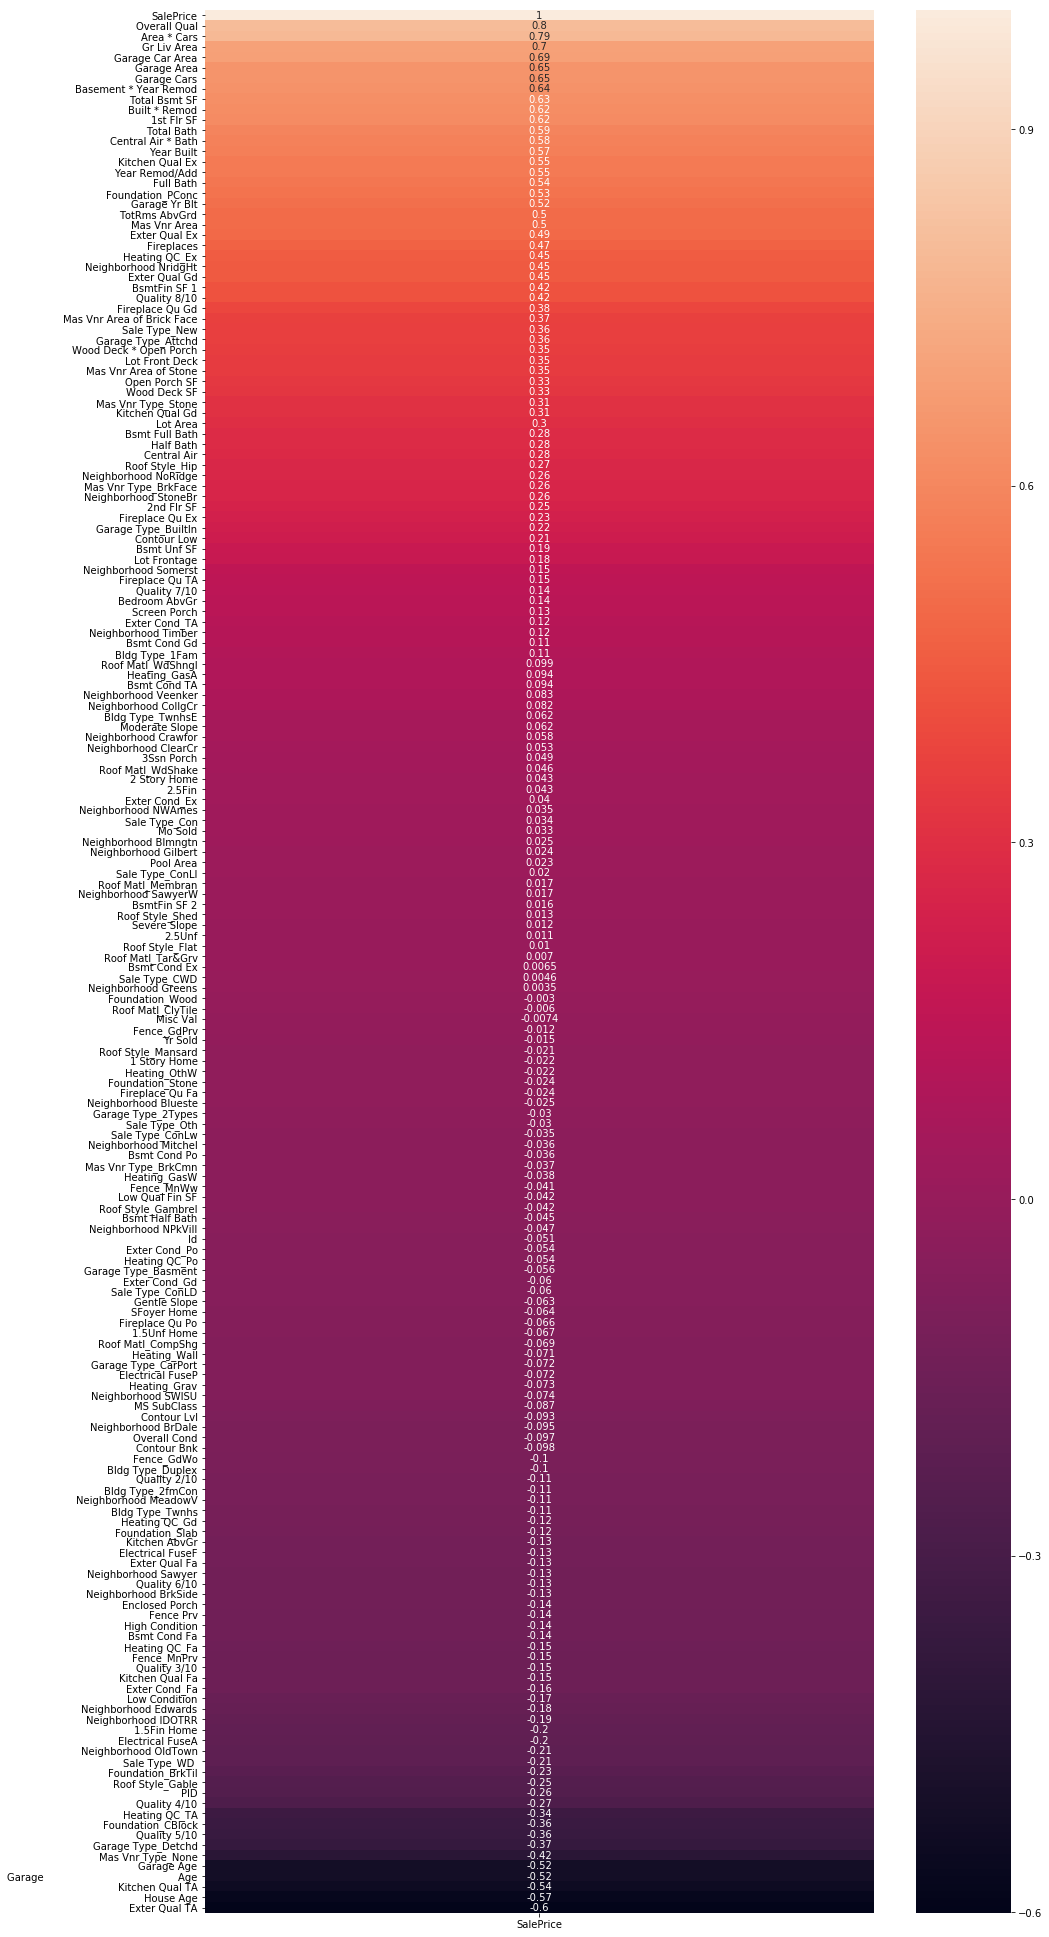

In [166]:
plt.figure(figsize=(15,35))
sns.heatmap(train.corr()[['SalePrice']].sort_values(by = ['SalePrice'], ascending = False), annot=True);

In [136]:
train['2nd Flr SF']

0        754
1       1209
2          0
3        700
4        614
        ... 
2046       0
2047       0
2048     741
2049       0
2050     776
Name: 2nd Flr SF, Length: 2051, dtype: int64

In [85]:
test['Sale Type_WD ']

0      1
1      1
2      0
3      1
4      1
      ..
874    1
875    1
876    1
877    1
878    1
Name: Sale Type_WD , Length: 879, dtype: uint8

# EDIT ONLY TOP LINE TO CHANGE SUBMISSION FILE 

In [137]:
xvariances = [
    'Quality 4/10', 'Quality 5/10', 'Quality 6/10', 'Quality 7/10', 'Quality 8/10',
    'Sale Type_New', 'Sale Type_WD ', 'Overall Qual',
    'Area * Cars', 'Garage Age',  '1st Flr SF', '2nd Flr SF',
    'Total Bsmt SF','TotRms AbvGrd', 'Lot Frontage',
    'Year Remod/Add', 'House Age',
    'Total Bath', 'Half Bath', 'Central Air', 'Fireplaces',
    'Wood Deck SF', 'Open Porch SF', 'Screen Porch',
    'Foundation_PConc', 'Foundation_CBlock', 'Foundation_BrkTil', 'Roof Style_Hip', 'Roof Style_Gable',
    'PID', 'Garage Type_Detchd', 'Garage Type_Attchd', 'Garage Type_BuiltIn', 
    'Heating QC_Ex', 
    
    # The below sections break quality options of Poor, Fair, etc into their own boolian columns.
    'Bsmt Cond Fa','Bsmt Cond Gd', # 'Bsmt Cond TA', 
    'Fireplace Qu Gd', 'Fireplace Qu Ex', # 'Fireplace Qu Po', 'Fireplace Qu Fa', 'Fireplace Qu TA',
    'Kitchen Qual Ex', 'Kitchen Qual Gd', 'Kitchen Qual TA',# 'Kitchen Qual Fa',
    'Exter Qual Gd', 'Exter Qual Ex', #'Exter Qual TA', 
    
#     # Broken apart house options, slope options, and whatever Mas Vnr stands for.
#     '1 Story Home', '2 Story Home', '1.5Fin Home', '1.5Unf Home', 'SFoyer Home', '2.5Unf', '2.5Fin', # Home Style Options
    'Mas Vnr Area', 'Mas Vnr Type_None','Mas Vnr Area of Brick Face', 'Mas Vnr Area of Stone',# 'Mas Vnr Type_BrkCmn',  # Mas Vnr Details
#     'Gentle Slope', 'Severe Slope', # Land Slope
#     'Contour Lvl', 'Contour Bnk', 'Contour Low', # Contour
    
#     # I broke every neighborhood into it's own boolian column, There might be a cleaner way to do this.
    'Neighborhood Sawyer', 'Neighborhood Timber', 'Neighborhood Edwards', 'Neighborhood OldTown', 
    'Neighborhood Somerst', 'Neighborhood StoneBr', 'Neighborhood NridgHt', 
    'Neighborhood IDOTRR', 'Neighborhood MeadowV', 'Neighborhood NoRidge', 'Neighborhood BrkSide',
    
    # These are the neighborhoods with a correlation between -10% and 10% that I may want to remove.
#     'Neighborhood Blmngtn', 'Neighborhood Blueste', 'Neighborhood Greens', 'Neighborhood SawyerW', 'Neighborhood NWAmes',
#     'Neighborhood Gilbert', 'Neighborhood Gilbert', 'Neighborhood NPkVill', 'Neighborhood SWISU', 'Neighborhood ClearCr',
#     'Neighborhood CollgCr',  'Neighborhood Crawfor', 'Neighborhood Veenker', 
    
             ] 

X = train[xvariances]
y = train['SalePrice']

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

### Linear Regression

In [139]:
lr = LinearRegression()
cross_val_score(lr, X_train, y_train, cv=5)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.880891242504965

### Ridge

In [140]:
ridge = Ridge(alpha=10)

In [141]:
ridge.fit(X_train, y_train)

C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23445e-19): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [142]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8789351502927706
0.8366753257202691


In [143]:
r_alphas = np.logspace(0, 5, 100)

In [144]:
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

In [145]:
ridge_cv.fit(X_train, y_train)

C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00736e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13778e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02189e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16256e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09767e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.92689e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.73209e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.9211e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.80954e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09145e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.77449e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.68857e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.50958e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.28544e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.56172e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.84882e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.86694e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.88715e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.59439e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.23381e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.81317e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.81133e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.82413e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09337e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.08555e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\nolan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.51452e-19): result may not be accurate.
  overwrite_a=True).T


RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [146]:
ridge_cv.coef_

array([-5.77675912e+02, -1.13166617e+04, -2.13360018e+04, -2.55212891e+04,
       -1.76978947e+04,  8.90079463e+03, -1.23343874e+03,  1.44193692e+04,
        6.38271594e+00,  6.97174025e+01,  2.53739277e+01,  2.73726647e+01,
        2.02514176e+01, -1.82724574e+03,  7.49661998e+01,  2.42027927e+02,
       -6.50024324e+01,  7.92652867e+03,  2.69525112e+03,  5.15561577e+03,
        9.32961123e+03,  1.89343568e+01, -9.51966877e+00,  6.27841202e+01,
       -4.16279755e+02, -2.33540996e+02, -6.57978930e+03,  3.75699156e+03,
        1.12922416e+02,  1.78681351e-05, -2.65424840e+02,  5.25968910e+03,
        4.37201857e+03,  5.47134844e+03, -4.80136514e+03,  4.73287479e+03,
        2.47172199e+03,  9.34498124e+03,  2.88335572e+04,  4.05508004e+03,
       -1.37637860e+03,  3.25465494e+03,  1.23876991e+04,  1.07604992e+01,
        2.86201358e+03,  5.02505081e+00, -8.14825055e+00, -3.10607998e+03,
        6.96885163e+03, -1.35840319e+04, -1.20163203e+04,  4.21624115e+03,
        2.96182182e+04,  

In [147]:
ridge_cv.alpha_

4.0370172585965545

In [148]:
ridge_cv.score(X_train, y_train)

0.8803152585720635

In [149]:
ridge_cv.score(X_test, y_test)

0.8394087309927591

### Lasso

In [150]:
i_alphas = np.logspace(0, 10, 100)
lasso = LassoCV(alphas=i_alphas, cv=5)
lasso.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e+00, 1.26185688e+00, 1.59228279e+00, 2.00923300e+00,
       2.53536449e+00, 3.19926714e+00, 4.03701726e+00, 5.09413801e+00,
       6.42807312e+00, 8.11130831e+00, 1.02353102e+01, 1.29154967e+01,
       1.62975083e+01, 2.05651231e+01, 2.59502421e+01, 3.27454916e+01,
       4.13201240e+01, 5.21400829e+01, 6.57933225e+01, 8.30217568e+01,
       1.04761575e+02, 1.32194115e+0...
       7.74263683e+08, 9.77009957e+08, 1.23284674e+09, 1.55567614e+09,
       1.96304065e+09, 2.47707636e+09, 3.12571585e+09, 3.94420606e+09,
       4.97702356e+09, 6.28029144e+09, 7.92482898e+09, 1.00000000e+10]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [151]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8806190529315662
0.8401968207966957


In [152]:
lasso.coef_

array([-9.77600517e+02, -1.25480654e+04, -2.27476913e+04, -2.71451875e+04,
       -1.97972689e+04,  9.24800583e+03, -8.22035791e+02,  1.45225520e+04,
        6.17533961e+00,  7.04924085e+01,  2.54103883e+01,  2.73277332e+01,
        2.01513773e+01, -1.73743590e+03,  7.37433990e+01,  2.42621998e+02,
       -6.96951241e+01,  7.87506401e+03,  2.74046553e+03,  5.13173358e+03,
        9.49906607e+03,  1.87191269e+01, -8.93684959e+00,  6.23816505e+01,
       -0.00000000e+00,  9.78343880e+01, -6.23860420e+03,  3.41702140e+03,
       -0.00000000e+00,  1.93486418e-05, -0.00000000e+00,  5.49271013e+03,
        4.31070053e+03,  5.20290757e+03, -4.44663031e+03,  4.28708377e+03,
        2.23322581e+03,  8.54586079e+03,  3.10657988e+04,  5.76003123e+03,
        0.00000000e+00,  2.79073261e+03,  1.07246149e+04,  1.02188335e+01,
        2.45587699e+03,  4.12426112e+00, -9.25713490e+00, -3.03568262e+03,
        7.04175996e+03, -1.41350708e+04, -1.23002174e+04,  4.83492080e+03,
        3.35355993e+04,  

# DO NOT DELETE BELOW HERE

In [153]:
Xtest = test[xvariances]
preds = lasso.predict(Xtest)

In [154]:
submission = pd.DataFrame(test['Id'])
submission['SalePrice'] = preds
submission.to_csv('./datasets/submission.csv', index=False)

# RUN ABOVE LINE ONLY TO CREATE SUBMISION

In [155]:
submission.head()

,Id,SalePrice
0,2658,131246.948629
1,2718,180861.653370
2,2414,213742.320788
3,1989,119272.926988
4,625,184181.809329
